# A toy example

**Purpose of this demo**: Motivate that abstract notions, such as sparse projection, are useful in practice.

+ Disclaimer: I'm not expert in Python - I use Python/Matlab as tools to validate algorithms and theorems. 
+ Thus, my implementations are not the most efficient ones + there might be bugs

**Problem definition: Linear regression**. 

\begin{align}
  y = A x^\star + w
\end{align}

+ $A \in \mathbb{R}^{n \times p}$
+ $x^\star \in \mathbb{R}^p$ 
+ $w \in \mathbb{R}^n$

Assume $n = p$, and $A$ is in general position.
Given $y$ and $A$:

\begin{equation*}
\begin{aligned}
& \underset{x \in \mathbb{R}^p}{\text{min}}
& & f(x) \triangleq \|y - A x\|_2^2
\end{aligned}
\end{equation*}

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from PIL import Image

import random
from numpy import linalg as la

p = 100  # Ambient dimension
n = 100  # Number of samples

# Generate a p-dimensional zero vector
x_star = np.random.randn(p)
# Normalize
x_star = (1 / la.norm(x_star, 2)) * x_star

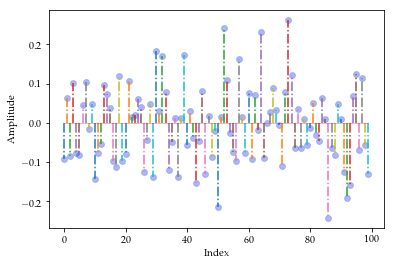

In [2]:
# Plot
xs = range(p)
markerline, stemlines, baseline = plt.stem(xs, x_star, '-.')
plt.setp(markerline, 'alpha', 0.3, 'ms', 6)
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color', 'r', 'linewidth', 1, 'alpha', 0.3)
plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.show()

<center> How would you solve this problem? </center>

<center>Closed form solution using matrix inverse</center>

\begin{align}
\widehat{x} = A^{-1} y
\end{align}

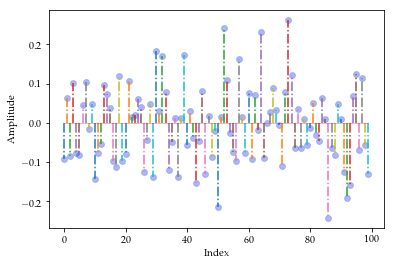

\|x^\star - x\|_2 = 1.9074385228078106e-14


In [3]:
A = np.random.randn(n, p)
y = A.dot(x_star)

A_inv = la.inv(A)
widehat_x = A_inv.dot(y)
# Plot
xs = range(p)
markerline, stemlines, baseline = plt.stem(xs, widehat_x, '-.')
plt.setp(markerline, 'alpha', 0.3, 'ms', 6)
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color', 'r', 'linewidth', 1, 'alpha', 0.3)
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.show()

print('\|x^\star - x\|_2 = {0}'.format(la.norm(x_star - widehat_x)))

**Problem definition: Sparse linear regression**. 

\begin{align}
  y = A x^\star + w
\end{align}

+ $A \in \mathbb{R}^{n \times p}$, but now $n \ll p$
+ $x^\star \in \mathbb{R}^p$ but $k$-sparse, where $k \ll p$
+ $w \in \mathbb{R}^n$

Assume $n = p$, and $A$ is in general position.
Given $y$ and $A$:

\begin{equation*}
\begin{aligned}
& \underset{x \in \mathbb{R}^p}{\text{min}}
& & f(x) \triangleq \|y - A x\|_2^2
\end{aligned}
\end{equation*}

<center> Would a similar technique solve the problem? </center>

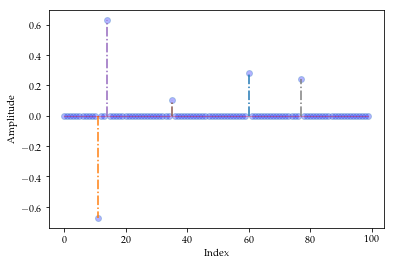

In [4]:
p = 100  # Ambient dimension
n = 40   # Number of samples
k = 5    # Sparsity level

# Generate a p-dimensional zero vector
x_star = np.zeros(p)
# Randomly sample k indices in the range [1:p]
x_star_ind = random.sample(range(p),  k) 
# Set x_star_ind with k random elements from Gaussian distribution
x_star[x_star_ind] = np.random.randn(k)
# Normalize
x_star = (1 / la.norm(x_star, 2)) * x_star

# Plot
xs = range(p)
markerline, stemlines, baseline = plt.stem(xs, x_star, '-.')
plt.setp(markerline, 'alpha', 0.3, 'ms', 6)
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color', 'r', 'linewidth', 1, 'alpha', 0.3)
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.show()

We will use the pseudo-inverse of $A$:

\begin{align}
A^\dagger = A^\top (AA^\top)^{-1}
\end{align}

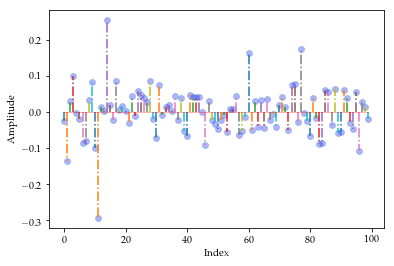

0.7439302576740402

In [5]:
A = np.random.randn(n, p)
y = A.dot(x_star)

A_inv = la.pinv(A)
widehat_x = A_inv.dot(y)
# Plot
xs = range(p)
markerline, stemlines, baseline = plt.stem(xs, widehat_x, '-.')
plt.setp(markerline, 'alpha', 0.3, 'ms', 6)
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color', 'r', 'linewidth', 1, 'alpha', 0.3)
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.show()

la.norm(x_star - widehat_x)

+ The reconstruction of $x^\star$ from $y$ is an ill-posed problem since $n < p$ and there is no hope in finding the *true vector* without ambiguity.
+ Additional prior information is needed. 
+ We might want to use the fact that $\|x\|_0 \leq k$ where $k \ll p$ and $\|\cdot\|_0$ is the $\ell_0$-"norm".
+ It turns out that, under proper assumptions on the sensing matrix $A$ and the sparsity level $k$, one can still recover $x^\star$! 

### Why sparsity?

Let us consider the following practical case: image processing. 

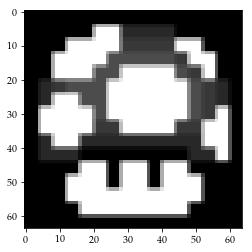

In [6]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

from PIL import Image

# Open image using Image package
x_mush_orig = Image.open("./SupportFiles/mushroom.png").convert("L")
# Transform to a np array
x_mush_star = np.fromstring(x_mush_orig.tobytes(), np.uint8)
# Set the shape of np array
x_mush_star.shape = (x_mush_orig.size[1], x_mush_orig.size[0])
# Show the image
plt.imshow(x_mush_star, interpolation = "nearest", cmap = plt.cm.gray)

Obviously, this is a simple image case: the "mushroom" image is sparse by itself (do you see the black pixels? Yes, they are zeros). To see this more clearly, let's sort the true coeffients in decreasing order.

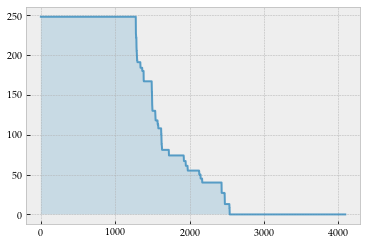

In [7]:
from bokeh.plotting import figure, show, output_file
from bokeh.palettes import brewer

# Get the absolute value of a flatten array (vectorize)
x_mush_abs = abs(x_mush_star.flatten()) 
# Sort the absolute values (ascending order)
x_mush_abs.sort()
# Descending order
x_mush_abs_sort = np.array(x_mush_abs[::-1])

plt.style.use('bmh')
fig, ax = plt.subplots()
# Generate an array with elements 1:len(...)
xs = np.arange(len(x_mush_abs_sort))
# Fill plot - alpha is transparency (might take some time to plot)
ax.fill_between(xs, 0, x_mush_abs_sort, alpha = 0.2)
# Plot - alpha is transparency (might take some time to plot)
ax.plot(xs, x_mush_abs_sort, alpha = 0.8)
plt.show()

For this 64 x 64 image, the total number of pixels sums up to 4096. As you can observe, by default almost half of the pixels are zero, which constitutes "mushroom" image sparse (but still the sparsity level is quite high: more than half the ambient dimension).

Since this seems to be a "cooked"-up example, let us consider a more *realistic* scenario: a brick house. (*Does anyone know where is this house?*)

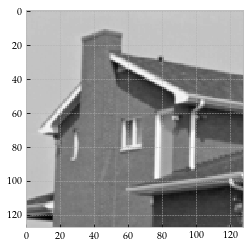

In [8]:
x_house_orig = Image.open("./SupportFiles/house128.png").convert("L")
x_house_star = np.fromstring(x_house_orig.tobytes(), np.uint8)
x_house_star.shape = (x_house_orig.size[1], x_house_orig.size[0])
plt.imshow(x_house_star, interpolation = "nearest", cmap = plt.cm.gray)

...and here is the bar plot of the coefficients.

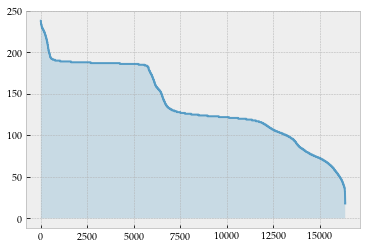

In [9]:
x_house_abs = abs(x_house_star.flatten()) 
x_house_abs.sort()
x_house_abs_sort = np.array(x_house_abs[::-1])

plt.style.use('bmh')
fig, ax = plt.subplots()
xs = np.arange(len(x_house_abs_sort))
ax.fill_between(xs, 0, x_house_abs_sort, alpha = 0.2)
plt.plot(xs, x_house_abs_sort, alpha=0.8)
plt.show()

+ All the coefficients are non-zero! Is there anything we can do in this case?

+ However: under proper orthonormal transformations, natural images become sparse. 

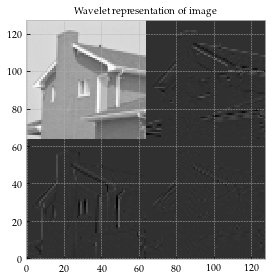

In [10]:
import pywt

x_house_orig = Image.open("./SupportFiles/house.png").convert("L")
x_house_star = np.fromstring(x_house_orig.tobytes(), np.uint8)
x_house_star.shape = (x_house_orig.size[1], x_house_orig.size[0])

# Defines a wavelet object - 'db1' defines a Daubechies wavelet
wavelet = pywt.Wavelet('db1')

# Multilevel decomposition of the input matrix
coeffs = pywt.wavedec2(x_house_star, wavelet, level=2)
cA2, (cH2, cV2, cD2), (cH1, cV1, cD1) = coeffs

# Concatenate the level-2 submatrices into a big one and plot
x_house_star_wav = np.bmat([[cA2, cH2], [cV2, cD2]])
plt.imshow(np.flipud(x_house_star_wav), origin='image', interpolation="nearest", cmap=plt.cm.gray)
plt.title("Wavelet representation of image", fontsize=10)
plt.tight_layout()

After wavelet transformation, let's plot the wavelet coefficients. 

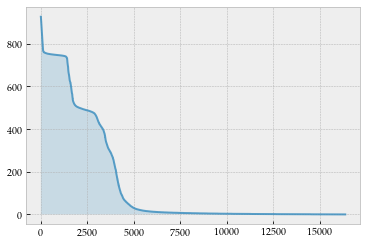

In [11]:
# Flatten and show the histogram
x_house_abs_wav = abs(x_house_star_wav.flatten()) 
x_house_abs_wav.sort()
x_house_abs_wav.flatten()
x_house_abs_wav_sort = np.array(x_house_abs_wav[::-1])

plt.style.use('bmh')
fig, ax = plt.subplots()
xs = np.arange(len(x_house_abs_wav_sort.flatten()))

ax.fill_between(xs, 0, np.flipud(x_house_abs_wav_sort.flatten()), alpha = 0.2)
plt.plot(xs, np.flipud(x_house_abs_wav_sort.transpose()), alpha = 0.8)
plt.show()

It is obvious that much less number of coefficients are non-zero! (...and this holds generally for naturally images.)

<function matplotlib.pyplot.show(*args, **kw)>

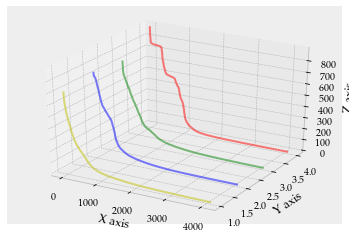

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
for c, z, zi in zip(['r', 'g', 'b', 'y'], ['./SupportFiles/house128.png', './SupportFiles/peppers128.png', './SupportFiles/man128.png', './SupportFiles/pedro128.png'], [4, 3, 2, 1]):
    y = Image.open(z).convert("L")
    y_star = np.fromstring(y.tobytes(), np.uint8)
    y_star.shape = (y.size[1], y.size[0])

    # Multilevel decomposition of the input matrix
    y_coeffs = pywt.wavedec2(y_star, wavelet, level=2)
    y_cA2, (y_cH2, y_cV2, y_cD2), (y_cH1, y_cV1, y_cD1) = y_coeffs

    # Concatenate the level-2 submatrices into a big one and plot
    y_star_wav = np.bmat([[y_cA2, y_cH2], [y_cV2, y_cD2]])

    y_abs_wav = abs(y_star_wav.flatten()) 
    y_abs_wav.sort()
    y_abs_wav.flatten()
    y_abs_wav_sort = np.array(y_abs_wav[::-1])

    xs = np.arange(len(y_abs_wav_sort.flatten()))
    cs = c    
    ys = [zi] * len(xs)
    ys = np.array(ys)
    
    ax.plot(xs, ys = ys.flatten(), zs = np.flipud(y_abs_wav_sort.flatten()), zdir = 'z', color = cs, alpha = 0.5)
            
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show



In the above picture, the y values (1.0 to 4.0) correspond to four different image cases (for chanity check, observe that the red curve is the same curve for the house.png case, presented above). 

One can observe that most of the coeffs are close to zero and only few of them (compared to the ambient dimension) are significantly large. This has led to the observation that keeping only the most important coefficients (even truncating the non-zero entries further) leads to a significant compression of the image. At the same time, only these coefficients can lead to a pretty good reconstruction of the original image. 

### Using sparse projections

In [13]:
import math

# Generate sensing matrix
A = (1 / math.sqrt(n)) * np.random.randn(n, p)

# Observation model
y = A @ x_star

**Gradient descent with sparse projections[7-8]**. Solve the criterion
\begin{align}
    \min_{x} ~ ~f(x) := \frac{1}{2}\|y - Ax\|_2^2 \quad \text{s.t.} \quad \|x\|_0 \leq k
\end{align} 

&nbsp;&nbsp;&nbsp;    &nbsp; &nbsp; &nbsp; *The IHT method* <br>
&nbsp;&nbsp;&nbsp;    1: &nbsp; Choose initial guess $x_0$ <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> i = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Compuete $\nabla f(x_i) = -A^\top \cdot (y - A x_i)$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\widehat{x}_{i+1} = x_i - \nabla f(x_i)$ <br>
&nbsp;&nbsp;&nbsp;    5:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{i+1} = \arg \min_{x \text{ is } k-\text{sparse}} \|\widehat{x}_{i+1} - x\|_2$ <br>
&nbsp;&nbsp;&nbsp;    5: &nbsp;  <b>end for</b>

Let's use this algorithm and see how it performs in practice.


In [14]:
from numpy import linalg as la

# Hard thresholding function
def hardThreshold(x, k):
    p = x.shape[0]
    t = np.sort(np.abs(x))[::-1]    
    threshold = t[k-1]
    j = (np.abs(x) < threshold)
    x[j] = 0
    return x

# Returns the value of the objecive function
def f(y, A, x):
    return 0.5 * math.pow(la.norm(y - A @ x, 2), 2)

In [15]:
def IHT(y, A, k, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    
    At = np.transpose(A)   # Transpose of A

    x_list, f_list = [1], [f(y, A, x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = -At @ (y - A @ x_new)
    
        # Perform gradient step
        x_temp = x_old - 0.5 * grad    
    
        # Perform hard thresholding step
        x_new = hardThreshold(x_temp, k)
    
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list
    

iter# = 0, ||x_new - x_old||_2 = 0.6278078048541862
iter# = 1, ||x_new - x_old||_2 = 0.15168501815573818
iter# = 2, ||x_new - x_old||_2 = 0.09489471852708613
iter# = 3, ||x_new - x_old||_2 = 0.0626135649892512
iter# = 4, ||x_new - x_old||_2 = 0.042147856862221576
iter# = 5, ||x_new - x_old||_2 = 0.08598807139705383
iter# = 6, ||x_new - x_old||_2 = 0.055254059518595154
iter# = 7, ||x_new - x_old||_2 = 0.041748386153261624
iter# = 8, ||x_new - x_old||_2 = 0.0322917165007403
iter# = 9, ||x_new - x_old||_2 = 0.025080824633778486
iter# = 10, ||x_new - x_old||_2 = 0.0194991648071751
iter# = 11, ||x_new - x_old||_2 = 0.015164207380197628
iter# = 12, ||x_new - x_old||_2 = 0.05209672284178393
iter# = 13, ||x_new - x_old||_2 = 0.02849574772039789
iter# = 14, ||x_new - x_old||_2 = 0.01745436703493445
iter# = 15, ||x_new - x_old||_2 = 0.011354814213106435
iter# = 16, ||x_new - x_old||_2 = 0.007497210747579234
iter# = 17, ||x_new - x_old||_2 = 0.004972407347801366
iter# = 18, ||x_new - x_old||_2 = 

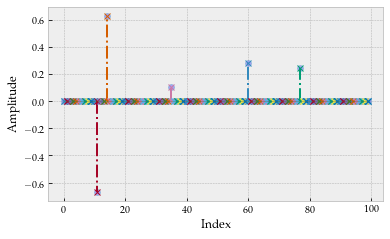

In [16]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 100

x_IHT, x_list, f_list = IHT(y, A, k, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs = range(p)
markerline, stemlines, baseline = plt.stem(xs, x_IHT, '-.x')
plt.setp(markerline, 'alpha', 0.3, 'ms', 6)
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'linewidth', 1, 'alpha', 0.3)
plt.xlabel('Index')
plt.ylabel('Amplitude')
#plt.title(r"$\|x^\star - \widehat{x}\|_2 = %s$" %(la.norm(x_star - x_IHT, 2)), fontsize=16)

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

This is great! IHT finds $\mathbf{x}^\star$ fast and 'accurately'. How fast? Let's create a convergence plot.

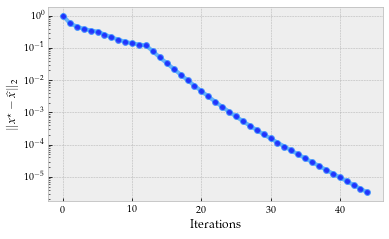

In [17]:
# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs = range(len(x_list))
plt.plot(xs, x_list, '-o', color = '#3399FF', linewidth = 4, alpha = 0.7, markerfacecolor = 'b')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()